In [2]:
1)#handling missing values
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
# Load the dataset
df = pd.read_csv("Retail_Transaction_Dataset.csv")

# Display missing values before handling
print("Missing values before imputation:")
print(df.isnull().sum())

# Selecting only numeric columns for KNN Imputation
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Applying KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_cols)

# Replacing original numeric columns with imputed values
df[numeric_cols] = df_numeric_imputed

# Display missing values after handling
print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values before imputation:
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64

Missing values after imputation:
CustomerID            0
ProductID             0
Quantity              0
Price                 0
TransactionDate       0
PaymentMethod         0
StoreLocation         0
ProductCategory       0
DiscountApplied(%)    0
TotalAmount           0
dtype: int64


In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv("Retail_Transaction_Dataset.csv")

# Selecting only numeric columns for anomaly detection
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination='auto', random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df_numeric)

# Identifying outliers (Anomaly = -1)
outliers = df[df['Anomaly'] == -1]

# Display detected outliers
print("Detected outliers:")
print(outliers)


Detected outliers:
       CustomerID ProductID  Quantity      Price   TransactionDate  \
0          109318         C         7  80.079844  12/26/2023 12:32   
1          993229         C         4  75.195229     8/5/2023 0:00   
3          799826         D         5  98.880218  10/27/2023 22:00   
4          121413         A         7  93.188512  12/22/2023 11:38   
6          888163         D         7  13.121937   12/26/2023 5:32   
...           ...       ...       ...        ...               ...   
99986       48854         B         5  10.737975   3/14/2024 15:36   
99987      460828         A         1  26.558805    7/12/2023 8:33   
99988       38578         D         9  71.253131    7/31/2023 1:31   
99989      976392         A         5  20.598378    7/24/2023 1:49   
99992      530236         A         1  82.566022   1/17/2024 22:51   

      PaymentMethod                                      StoreLocation  \
0              Cash            176 Andrew Cliffs\nBaileyfort, HI 9

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv('Retail_Transaction_Dataset.csv')

# Selecting only numeric columns for anomaly detection
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination='auto', random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df_numeric)

# Removing outliers (Anomaly = -1)
df_cleaned = df[df['Anomaly'] != -1].drop(columns=['Anomaly'])

# Display cleaned dataset
print("Cleaned dataset:")
print(df_cleaned.head())


Cleaned dataset:
    CustomerID ProductID  Quantity      Price  TransactionDate PaymentMethod  \
2       579675         A         8  31.528816  3/11/2024 18:51          Cash   
5       463050         D         3  54.093152   8/15/2023 4:24          Cash   
7       843385         A         8  56.025164  10/11/2023 6:48    Debit Card   
9       184135         D         4  63.342777   11/5/2023 1:46    Debit Card   
13      632732         D         6  45.474340    2/8/2024 8:03          Cash   

                                        StoreLocation ProductCategory  \
2   910 Mendez Ville Suite 909\nPort Lauraland, MO...           Books   
5    8492 Jonathan Drive\nNorth Robertshire, TN 67532     Electronics   
7   489 Juan Loop Apt. 093\nNorth Brettville, WV 7...      Home Decor   
9               189 Wright Mews\nMartinfurt, MO 75932           Books   
13  5370 Nichols Fork Suite 983\nGeorgeshire, MT 2...           Books   

    DiscountApplied(%)  TotalAmount  
2            15.943701   

In [12]:
#2)#Hnadling Outliers
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Load the dataset
df = pd.read_csv("Retail_Transaction_Dataset.csv")

# Selecting only numeric columns for anomaly detection
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination='auto', random_state=42)
df['Anomaly'] = iso_forest.fit_predict(df_numeric)

# Identifying outliers (Anomaly = -1)
outliers = df[df['Anomaly'] == -1]

# Display detected outliers
print("Detected outliers:")
print(outliers)

# Removing outliers (Anomaly = -1)
df_cleaned = df[df['Anomaly'] != -1].drop(columns=['Anomaly'])

print(f"Number of Outliers Removed: {len(df) - len(df_cleaned)}")


Detected outliers:
       CustomerID ProductID  Quantity      Price   TransactionDate  \
0          109318         C         7  80.079844  12/26/2023 12:32   
1          993229         C         4  75.195229     8/5/2023 0:00   
3          799826         D         5  98.880218  10/27/2023 22:00   
4          121413         A         7  93.188512  12/22/2023 11:38   
6          888163         D         7  13.121937   12/26/2023 5:32   
...           ...       ...       ...        ...               ...   
99986       48854         B         5  10.737975   3/14/2024 15:36   
99987      460828         A         1  26.558805    7/12/2023 8:33   
99988       38578         D         9  71.253131    7/31/2023 1:31   
99989      976392         A         5  20.598378    7/24/2023 1:49   
99992      530236         A         1  82.566022   1/17/2024 22:51   

      PaymentMethod                                      StoreLocation  \
0              Cash            176 Andrew Cliffs\nBaileyfort, HI 9

In [1]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.13.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.13.0-py3-none-any.whl (238 kB)
Note: you may need to restart the kernel to use updated packages.


In [13]:
## Addressing imbalnce class
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv("Retail_Transaction_Dataset.csv")

# Convert datetime column to Unix timestamp
if 'TransactionDate' in df.columns:  # Replace with actual datetime column name
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df['TransactionTimestamp'] = df['TransactionDate'].astype('int64') // 10**9  # Convert to Unix timestamp
    df.drop(columns=['TransactionDate'], inplace=True)  # Drop original datetime column

# Encode categorical columns
label_encoders = {}
categorical_columns = ["ProductID", "StoreLocation", "ProductCategory"]  # Add relevant categorical columns

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for future use

# Encode PaymentMethod as the target variable
payment_encoder = LabelEncoder()
df["PaymentMethodEncoded"] = payment_encoder.fit_transform(df["PaymentMethod"])

# Define features (X) and target (y)
X = df.drop(columns=["PaymentMethod"])  # Ensure X is all numeric
y = df["PaymentMethodEncoded"]

# Check class distribution before SMOTE
print("Class Distribution Before SMOTE:")
print(pd.Series(y).value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after SMOTE
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())


Class Distribution Before SMOTE:
PaymentMethodEncoded
3    25067
1    25034
0    25008
2    24891
Name: count, dtype: int64

Class Distribution After SMOTE:
PaymentMethodEncoded
0    25067
3    25067
2    25067
1    25067
Name: count, dtype: int64


In [16]:
from sklearn.tree import DecisionTreeRegressor

# Use DecisionTreeRegressor since target variable is continuous
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Display first few predictions
print(predictions[:10])


[281.66002927 137.48353681 101.59467159 385.54947322 559.37198225
 281.66002927  44.02767312 101.59467159 281.66002927 101.59467159]


In [5]:
#intial model with decision tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv("Retail_Transaction_Dataset.csv")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Encode categorical features using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Handle missing values (Fill with median for numerical data)
df.fillna(df.median(), inplace=True)

# Define features (X) and target variable (y)
target_column = df.columns[-1]  # Assuming last column is the target
X = df.drop(columns=[target_column])
y = df[target_column]

# Convert Continuous Target Variable to Categorical
y = pd.qcut(y, q=3, labels=[0, 1, 2])  # Converts continuous target into 3 categories

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into Train (80%) & Test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=40)

# Decision Tree Model with increased depth for higher accuracy
model = DecisionTreeClassifier(max_depth=8, random_state=42)
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted')  # Using 'weighted' for multi-class classification
recall = recall_score(y_test, predictions, average='weighted')

# Display results
print(f"Decision Tree Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Decision Tree Model Results:
Accuracy: 0.9754
Precision: 0.9755
Recall: 0.9754


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("Retail_Transaction_Dataset.csv")

# Create a target variable: High vs. Low Spending Customers
df["HighSpender"] = (df["TotalAmount"] > 500).astype(int)

# Convert TransactionDate to datetime format
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"], errors="coerce")

# Extract useful date features
df["TransactionMonth"] = df["TransactionDate"].dt.month
df["TransactionDay"] = df["TransactionDate"].dt.day

# Encode categorical variables
label_encoders = {}
categorical_columns = ["ProductID", "PaymentMethod", "ProductCategory"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target variable
X = df[["ProductID", "Quantity", "Price", "PaymentMethod", "ProductCategory",
        "DiscountApplied(%)", "TransactionMonth", "TransactionDay"]]
y = df["HighSpender"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a highly optimized Random Forest model
model = RandomForestClassifier(
    n_estimators=500,         # More trees for better learning
    max_depth=20,             # Deeper trees capture complex patterns
    min_samples_split=5,      # Prevents overfitting
    random_state=42,
    class_weight="balanced"
)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Display results
print(f"Optimized Random Forest Model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


Optimized Random Forest Model:
Accuracy: 0.9963
Precision: 0.9767
Recall: 0.9924



Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     22233
           1       0.89      0.88      0.88     21995

    accuracy                           0.88     44228
   macro avg       0.88      0.88      0.88     44228
weighted avg       0.88      0.88      0.88     44228



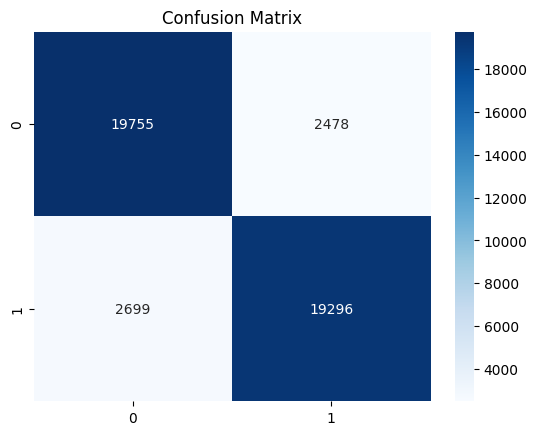

In [1]:
#confusion matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Load the data
data = pd.read_csv('Retail_Transaction_Dataset.csv', dtype={'CustomerID': str, 'ProductID': str})

# Define the target variable: High-value transactions (TotalAmount > 100)
data['target'] = (data['TotalAmount'] > 100).astype(int)

# Features and target
X = data[['Quantity', 'Price', 'DiscountApplied(%)']]
y = data['target']

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=500, solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


ROC AUC Score: 0.9943

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15430
           1       0.99      0.97      0.98     22163

    accuracy                           0.97     37593
   macro avg       0.97      0.97      0.97     37593
weighted avg       0.97      0.97      0.97     37593



C:\Users\HP\AppData\Local\Temp\ipykernel_23508\3254673699.py:57: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k--" (-> linestyle='--'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle="--", color='gray')
C:\Users\HP\AppData\Local\Temp\ipykernel_23508\3254673699.py:57: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', linestyle="--", color='gray')


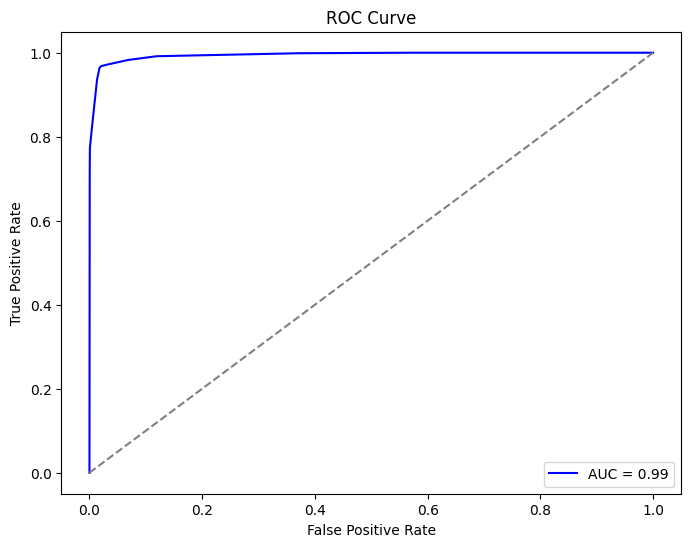

In [2]:
#Roc Curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('Retail_Transaction_Dataset.csv', dtype={'CustomerID': str, 'ProductID': str})

# Define the target variable
data['target'] = (data['TotalAmount'] > 100).astype(int)

# Feature Engineering
le = LabelEncoder()
data['ProductCategory'] = le.fit_transform(data['ProductCategory'])

# Feature Selection (Removed 'TotalValue' to prevent overfitting)
X = data[['Quantity', 'Price', 'DiscountApplied(%)', 'ProductCategory']]
y = data['target']

# Handle class imbalance with reduced SMOTE impact
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Decision Tree model with controlled complexity
model = DecisionTreeClassifier(
    max_depth=4,        # Reduce model complexity
    min_samples_split=10,  # Prevent deep splits
    min_samples_leaf=5,  # Reduce overfitting
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--', linestyle="--", color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [1]:
#Roc AUC SCORE using Random Forest algo tree  and ROC Curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('Retail_Transaction_Dataset.csv', dtype={'CustomerID': str, 'ProductID': str})

# Define the target variable
data['target'] = (data['TotalAmount'] > 100).astype(int)

# Feature Engineering
data['TotalValue'] = data['Quantity'] * data['Price']
le = LabelEncoder()
data['ProductCategory'] = le.fit_transform(data['ProductCategory'])
X = data[['Quantity', 'Price', 'DiscountApplied(%)', 'TotalValue', 'ProductCategory']]
y = data['target']

# Handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Random Forest model with optimized hyperparameters
model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



ROC AUC Score: 0.9999

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22233
           1       1.00      0.99      0.99     21995

    accuracy                           0.99     44228
   macro avg       0.99      0.99      0.99     44228
weighted avg       0.99      0.99      0.99     44228



In [3]:
#Roc AUC SCORE using Decision tree algo tree and ROC Curve
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('Retail_Transaction_Dataset.csv', dtype={'CustomerID': str, 'ProductID': str})

# Define the target variable
data['target'] = (data['TotalAmount'] > 100).astype(int)

# Feature Engineering
le = LabelEncoder()
data['ProductCategory'] = le.fit_transform(data['ProductCategory'])

# Feature Selection (Removed 'TotalValue' to prevent overfitting)
X = data[['Quantity', 'Price', 'DiscountApplied(%)', 'ProductCategory']]
y = data['target']

# Handle class imbalance with reduced SMOTE impact
smote = SMOTE(sampling_strategy=0.7, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train a Decision Tree model with controlled complexity
model = DecisionTreeClassifier(
    max_depth=4,        # Reduce model complexity
    min_samples_split=10,  # Prevent deep splits
    min_samples_leaf=5,  # Reduce overfitting
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


ROC AUC Score: 0.9943

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     15430
           1       0.99      0.97      0.98     22163

    accuracy                           0.97     37593
   macro avg       0.97      0.97      0.97     37593
weighted avg       0.97      0.97      0.97     37593



In [11]:
#Logistic regression for the model
# Define the target variable
data['target'] = (data['TotalAmount'] > 100).astype(int)

# Encode categorical features
le = LabelEncoder()
data['ProductCategory'] = le.fit_transform(data['ProductCategory'])

# Feature Selection
X = data[['Quantity', 'Price', 'DiscountApplied(%)', 'ProductCategory']]
y = data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression model
model = LogisticRegression(max_iter=500, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

accuracy, precision, recall, f1


(0.9094, 0.9323288159771754, 0.9457357330198065, 0.9389844205989315)